In [148]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()


#Model building libraries
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import xgboost as xgb
import lightgbm as lgb

In [2]:
house_df = pd.read_csv('./train.csv')

In [3]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
house_df.isnull().sum()[house_df.isnull().sum() != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
house_df.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

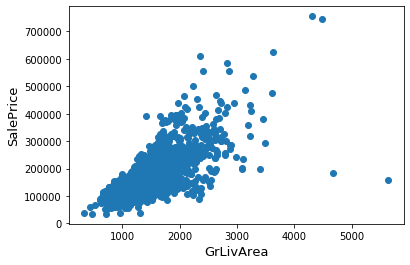

In [7]:
#fig, ax = plt.subplots()
plt.scatter(x = house_df['GrLivArea'], y = house_df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

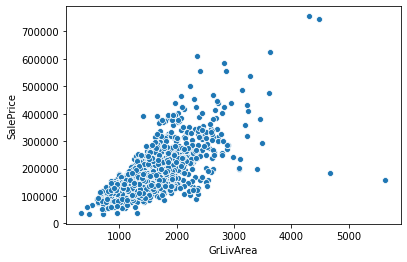

In [8]:
sns.scatterplot(x = house_df['GrLivArea'], y = house_df['SalePrice'])

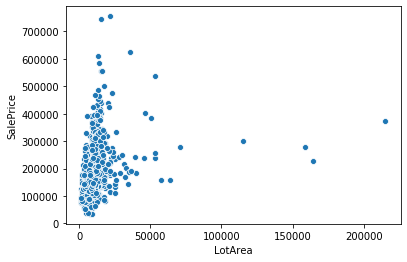

In [9]:
sns.scatterplot(x = house_df['LotArea'], y = house_df['SalePrice'])

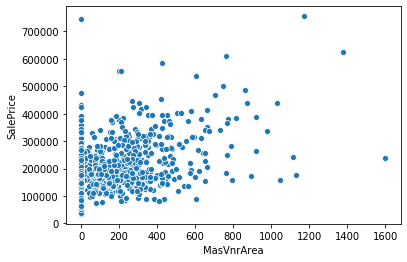

In [10]:
sns.scatterplot(x = house_df['MasVnrArea'], y = house_df['SalePrice'])

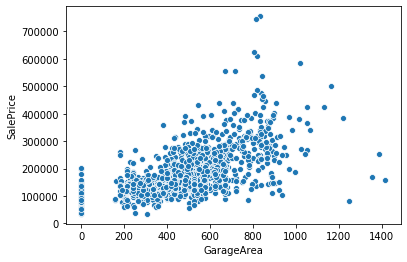

In [11]:
sns.scatterplot(x = house_df['GarageArea'], y = house_df['SalePrice'])

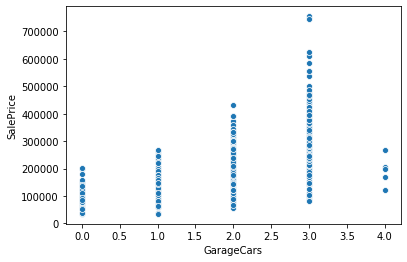

In [12]:
sns.scatterplot(x = house_df['GarageCars'], y = house_df['SalePrice'])

In [13]:
house_df = house_df.drop(house_df[(house_df['GrLivArea']>4000) & (house_df['SalePrice']<300000)].index)

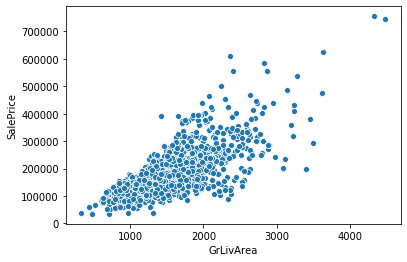

In [14]:
sns.scatterplot(x = house_df['GrLivArea'], y = house_df['SalePrice'])

In [15]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics


 mu = 180932.92 and sigma = 79467.79



Text(0.5, 1.0, 'SalePrice distribution')

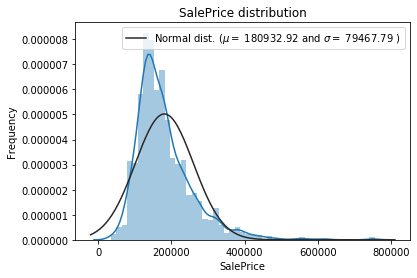

In [16]:
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(house_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

sns.distplot(house_df['SalePrice'] , fit=norm)
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

## Log transformation of target variable: **SalePrice** to make it normally distributed


 mu = 12.02 and sigma = 0.40



Text(0.5, 1.0, 'SalePrice distribution')

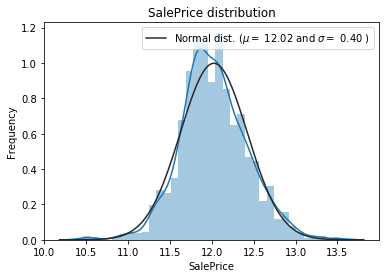

In [17]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
house_df["SalePrice"] = np.log1p(house_df["SalePrice"])

#Check the new distribution 
sns.distplot(house_df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(house_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

In [18]:
test_df = pd.read_csv('./test.csv')

#Save the 'Id' column
train_ID = house_df['Id']
test_ID = test_df['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
house_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

## Feature Engineering

Finding correlation between all the attributes and SalePrice

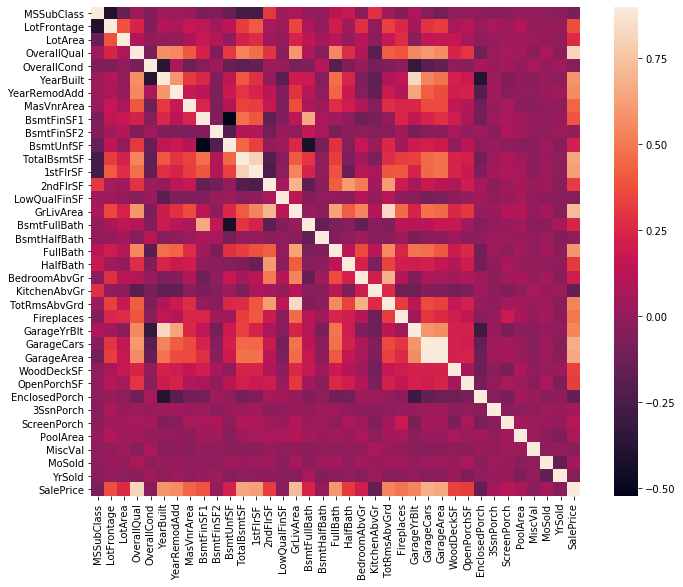

In [19]:
#Correlation map to see how features are correlated with SalePrice
corr_matrix = house_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=0.9, square=True)

Find the missing values in the data

LotFrontage     17.764060
Alley           93.758573
MasVnrType       0.548697
MasVnrArea       0.548697
BsmtQual         2.537723
BsmtCond         2.537723
BsmtExposure     2.606310
BsmtFinType1     2.537723
BsmtFinType2     2.606310
Electrical       0.068587
FireplaceQu     47.325103
GarageType       5.555556
GarageYrBlt      5.555556
GarageFinish     5.555556
GarageQual       5.555556
GarageCond       5.555556
PoolQC          99.588477
Fence           80.727023
MiscFeature     96.296296
dtype: float64


Text(0.5, 1.0, 'Percentage of missing data')

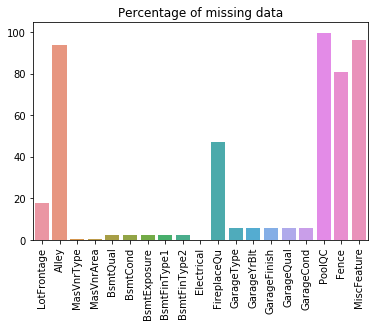

In [20]:
missing_train = (house_df.isnull().sum()[house_df.isnull().sum() != 0]*100/house_df.isnull().count()[house_df.isnull().sum() != 0])
print(missing_train)
sns.barplot(x = missing_train.index, y = missing_train)
plt.xticks(rotation = '90')
plt.title('Percentage of missing data')

MSZoning         0.274160
LotFrontage     15.558602
Alley           92.666210
Utilities        0.137080
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType       1.096642
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
KitchenQual      0.068540
Functional       0.137080
FireplaceQu     50.034270
GarageType       5.209047
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageCars       0.068540
GarageArea       0.068540
GarageQual       5.346127
GarageCond       5.346127
PoolQC          99.794380
Fence           80.123372
MiscFeature     96.504455
SaleType         0.068540
dtype: float64


Text(0.5, 1.0, 'Percentage of missing data')

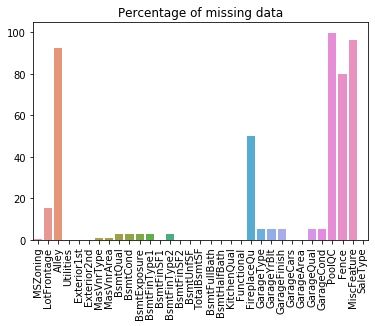

In [21]:
missing_test = test_df.isnull().sum()[test_df.isnull().sum() != 0]*100/test_df.isnull().count()[test_df.isnull().sum() != 0]
print(missing_test)
sns.barplot(x = missing_test.index, y = missing_test)
plt.xticks(rotation = '90')
plt.title('Percentage of missing data')

Impute the missing values in the data

In [22]:
train_df = house_df

In [23]:
train_df["Alley"] = train_df["Alley"].fillna("None")
test_df["Alley"] = test_df["Alley"].fillna("None")

In [24]:
train_df["FireplaceQu"] = train_df["FireplaceQu"].fillna("None")
test_df["FireplaceQu"] = test_df["FireplaceQu"].fillna("None")

In [25]:
train_df["PoolQC"] = train_df["PoolQC"].fillna("None")
test_df["PoolQC"] = test_df["PoolQC"].fillna("None")

In [26]:
train_df["Fence"] = train_df["Fence"].fillna("None")
test_df["Fence"] = test_df["Fence"].fillna("None")

In [27]:
train_df["MiscFeature"] = train_df["MiscFeature"].fillna("None")
test_df["MiscFeature"] = test_df["MiscFeature"].fillna("None")

In [28]:
for col in ['GarageType', 'GarageFinish', 'GarageCond','GarageQual']:
    train_df[col] = train_df[col].fillna('None')
    test_df[col] = test_df[col].fillna('None')

for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    train_df[col] = train_df[col].fillna(0)
    test_df[col] = test_df[col].fillna(0)

for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']:
    train_df[col] = train_df[col].fillna(0)
    test_df[col] = test_df[col].fillna(0)

for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
    train_df[col] = train_df[col].fillna(0)
    test_df[col] = test_df[col].fillna(0)    

In [29]:
train_df['MasVnrType'] = train_df['MasVnrType'].fillna("None")
test_df['MasVnrType'] = test_df['MasVnrType'].fillna("None")

train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(0)
test_df['MasVnrArea'] = test_df['MasVnrArea'].fillna(0)

Now, we impute some values with the median or mode of all data, train and test, to get better results in models

In [30]:
ntrain = train_df.shape[0]
ntest = test_df.shape[0]
all_data = pd.concat((train_df,test_df)).reset_index(drop = True)

C:\Users\mistr\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
all_data['MSZoning'].value_counts()

RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [32]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [33]:
all_data['Functional'].value_counts()

Typ     2715
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [34]:
all_data['Functional'] = all_data['Functional'].fillna(all_data['Functional'].mode()[0])

In [35]:
all_data['KitchenQual'].value_counts()

TA    1492
Gd    1151
Ex     203
Fa      70
Name: KitchenQual, dtype: int64

In [36]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [37]:
all_data['Exterior1st'].value_counts()

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     125
BrkFace      87
WdShing      56
AsbShng      44
Stucco       42
BrkComm       6
AsphShn       2
CBlock        2
Stone         2
ImStucc       1
Name: Exterior1st, dtype: int64

In [38]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])

In [39]:
all_data['Exterior2nd'].value_counts()

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     125
Wd Shng      81
BrkFace      47
Stucco       46
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [40]:
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [41]:
all_data['SaleType'].value_counts()

WD       2525
New       237
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [42]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [43]:
all_data['MSSubClass'].value_counts()

20     1079
60      573
50      287
120     182
30      139
160     128
70      128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [44]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [45]:
all_data['Electrical'].value_counts()

SBrkr    2669
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [46]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [47]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [48]:
all_data['Utilities'].value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

We drop 'Utilities' column as all the values are 'AllPub' except 1, so it won't add anything to the model

In [49]:
all_data = all_data.drop(['Utilities'], axis = 1)

In [50]:
all_data.isnull().sum()[all_data.isnull().sum()!=0]

SalePrice    1459
dtype: int64

In [51]:
y_train = train_df['SalePrice'].values

In [52]:
all_data = all_data.drop(['SalePrice'], axis = 1)

Changing the data types of attributes to string and numerical for the model

In [53]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 78 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            2917 non-null object
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2917 non-null object
BsmtExposure     2917 non-null object
BsmtFinSF1       2917 non-null float64
BsmtFinSF2       2917 non-null float64
BsmtFinType1     2917 non-null object
BsmtFinType2     2917 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2917 non-null object
BsmtUnfSF        2917 non-null float64
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2917 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      29

In [54]:
# Converting to Categorical values
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].astype(str)
all_data['YearBuilt'] = all_data['YearBuilt'].astype(str)

all_data['MSSubClass'] = all_data['MSSubClass'].astype(str)

all_data['OverallCond'] = all_data['OverallCond'].astype(str)

Label Encoding Catagorical variables for certain information in their ordering set

In [55]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'GarageYrBlt', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'YearBuilt')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 78)


In [56]:
# Add total sqfootage feature
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [57]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


### Box Cox Transformation of highly skewed features

In [58]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to Box Cox transform


Creating dummy categorical features

In [59]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 220)


Creating train and test datasets

In [60]:
train = all_data[:ntrain]
test = all_data[ntrain:]

## Creating Models

Defining cross validation with shuffling as a fuction 

In [62]:
#Validation function
n_folds = 5

def cv_score(model, rmse = True):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    if rmse:
        rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
        return(rmse)
    return cross_val_score(model, train.values, y_train, cv = kf)

In [ ]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

### LASSO Regression

As this models is very sensitive to outliers, we use RobustScalar()

In [111]:
lasso = Lasso(alpha = 0.0005, random_state = 1)

In [112]:
lasso.get_params()

{'alpha': 0.0005,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': 1,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [113]:
parameters = {'alpha': np.linspace(0,1,5000)}

In [114]:
lasso_tuned = GridSearchCV(lasso, parameters)

In [115]:
lasso_robust = make_pipeline(RobustScaler(), lasso_tuned)

In [116]:
lasso_robust.fit(train, y_train)

C:\Users\mistr\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mistr\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\mistr\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.282030647352934, tolerance: 0.018911334381783333
  positive)
C:\Users\mistr\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mi

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('gridsearchcv',
                 GridSearchCV(cv=None, error_score=nan,
                              estimator=Lasso(alpha=0.0005, copy_X=True,
                                              fit_intercept=True, max_iter=1000,
                                              normalize=False, positive=False,
                                              precompute=False, random_state=1,
                                              selection='cyclic', tol=0.0001,
                                              warm_start=False),
                              iid='deprecated', n_jobs=None,
                              param_grid={'alpha': array([0.00000000e+00, 2.00040008e-04, 4.00080016e-04, ...,
       9.99599920e-01, 9.99799960e-01, 1.00000000e+00])},
                            

In [117]:
rmsle(y_train, lasso_robust.predict(train))

0.1007233819624177

In [139]:
r2_score(y_train, lasso_robust.predict(train))

0.9364577777125386

In [118]:
ENet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)

In [119]:
ENet.get_params()

{'alpha': 0.0005,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.9,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': 3,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [120]:
ENet_tuned = GridSearchCV(ENet, parameters)

In [121]:
ENet_robust = make_pipeline(RobustScaler(), ENet_tuned)

In [123]:
ENet_robust.fit(train,y_train)

C:\Users\mistr\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mistr\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\mistr\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.282030647352934, tolerance: 0.018911334381783333
  positive)
C:\Users\mistr\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\mi

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('gridsearchcv',
                 GridSearchCV(cv=None, error_score=nan,
                              estimator=ElasticNet(alpha=0.0005, copy_X=True,
                                                   fit_intercept=True,
                                                   l1_ratio=0.9, max_iter=1000,
                                                   normalize=False,
                                                   positive=False,
                                                   precompute=False,
                                                   random_state=3,
                                                   selection='cyclic',
                                                   tol=0.0001,
                                                   warm_start=False),
          

In [124]:
rmsle(y_train, ENet_robust.predict(train))

0.10225887441130899

In [138]:
r2_score(y_train, ENet_robust.predict(train))

0.9345056529910116

In [125]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [126]:
KRR.get_params()

{'alpha': 0.6,
 'coef0': 2.5,
 'degree': 2,
 'gamma': None,
 'kernel': 'polynomial',
 'kernel_params': None}

In [143]:
parameters = {'kernel': ['polynomial', 'rbf'],"alpha": np.linspace(0,1,100),
                              "gamma": np.logspace(-2, 2, 5)}

In [144]:
KRR_tuned = GridSearchCV(KRR,parameters)

In [145]:
KRR_tuned.fit(train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KernelRidge(alpha=0.6, coef0=2.5, degree=2, gamma=None,
                                   kernel='polynomial', kernel_params=None),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414...
       0.80808081, 0.81818182, 0.82828283, 0.83838384, 0.84848485,
       0.85858586, 0.86868687, 0.87878788, 0.88888889, 0.8989899 ,
       0.90909091, 0.91919192, 0.92929293, 0.93939394, 0.94949495,
       0.95959596, 0.96969697, 0.97979798, 0.98989899, 1.        ]),
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['polynomial', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0

In [146]:
rmsle(y_train, KRR_tuned.predict(train))

0.07665887637139564

In [147]:
r2_score(y_train, KRR_tuned.predict(train))

0.9631933154569883

In [66]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [130]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [131]:
model_xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.4603,
 'gamma': 0.0468,
 'importance_type': 'gain',
 'learning_rate': 0.05,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1.7817,
 'missing': None,
 'n_estimators': 2200,
 'n_jobs': 1,
 'nthread': -1,
 'objective': 'reg:linear',
 'random_state': 7,
 'reg_alpha': 0.464,
 'reg_lambda': 0.8571,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': 1,
 'subsample': 0.5213,
 'verbosity': 1}

In [132]:
model_xgb.fit(train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1.7817, missing=None,
             n_estimators=2200, n_jobs=1, nthread=-1, objective='reg:linear',
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, seed=None, silent=1, subsample=0.5213,
             verbosity=1)

In [133]:
rmsle(y_train, model_xgb.predict(train))

0.07878888058811206

In [137]:
r2_score(y_train, model_xgb.predict(train))

0.9611195161577266

In [140]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [141]:
model_lgb.fit(train, y_train)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.2319, feature_fraction_seed=9,
              importance_type='split', learning_rate=0.05, max_bin=55,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=6, min_split_gain=0.0,
              min_sum_hessian_in_leaf=11, n_estimators=720, n_jobs=-1,
              num_leaves=5, objective='regression', random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [142]:
r2_score(y_train, model_lgb.predict(train))

0.9675399469477988